In [1]:
print(__doc__)

# Code source adapted from: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd
import os
import csv
import pprint

pp = pprint.PrettyPrinter(indent=4)

Automatically created module for IPython interactive environment


In [2]:
def treat_dataset(dataset):
    vcut = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
    vcolor = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}
    vclarity = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
    
    target = []
    new_data = []
    for row in dataset:
        # Modify string to number values
        row["cut"] = vcut[row["cut"]]
        row["color"] = vcolor[row["color"]]
        row["clarity"] = vclarity[row["clarity"]]
        
        new_data.append([])
        nrow = new_data[len(new_data)-1]
        
        # Add X0 for ease of use
        nrow.append(1)
        
        # Normalize values
        nrow.append(((float(row["carat"]) - (0.2+5.01)/2)/((0.2+5.01))))
        nrow.append((float(row["cut"]) - (4/2))/4)
        nrow.append((float(row["color"]) - (6/2))/6)
        nrow.append((float(row["clarity"]) - (7/2))/7)
        nrow.append((float(row["x"]) - (10.74/2))/(10.74))
        nrow.append((float(row["y"]) - (58.9/2))/(58.9))
        nrow.append((float(row["z"]) - (31.8/2))/(31.8))
        nrow.append((float(row["depth"]) - (43+79)/2)/(43+79))
        nrow.append((float(row["table"]) - (43+95)/2)/(43+95))
        
        # Remove target element and insert into it's own list
        target.append(float(row["price"]))
        del row["price"]
    return new_data, target

In [3]:
# Read and treat training dataset
dataset_train = []
reader = csv.DictReader(open('diamonds-train.csv', 'r'))
for line in reader:
     dataset_train.append(line)

dataset_train, target_train = treat_dataset(dataset_train)

# Read and treat test dataset
dataset_test = []
reader = csv.DictReader(open('diamonds-test.csv', 'r'))
for line in reader:
     dataset_test.append(line)

dataset_test, target_test = treat_dataset(dataset_test)

# Auxilary vector for name to number mapping
ds_index = {"x0":0, "carat":1, "cut":2, "color":3, "clarity":4, "x":5, "y":6, "z":7, "depth":8, "table":9}

In [4]:
def calculate_cost_function(thetas, data, target):
    m = len(data)
    s = 0
    for index in range(len(data)):
        h = 0
        for k in range(len(data[index])):
            h += thetas[k] * data[index][k]
        s += (h - float(target[index]))*(h - float(target[index]))
    return (1/(2*m)) * s

def init_thetas(data):
    if len(data) == 0:
        return []
    thetas = []
    for k in range(len(data[0])):
        thetas.append(0)
    return thetas

def get_predictions(data, thetas):
    res = []
    for row in range(len(data)):
        res.append(np.matmul([data[row]],np.column_stack([thetas]))[0,0])
    return res

def get_feature(data, f):
    res = []
    for row in data:
        res.append(row[ds_index[f]])
    return res

def graph_add_scatter(x, y, c='black'):
    plt.scatter(x, y, color= c)

def graph_add_line(x, y, c='black'):
    plt.plot(x, y, color=c, linewidth=3)

def plot():
    plt.xticks()
    plt.yticks()

    plt.show()
    plt.close()

In [135]:
#####################################
#                                   #
#       STOCHASTIC ALGORITHM        #
#                                   #
#####################################

# Parameters:

learningRate    = 1e-02
max_iterations  = 10000
batch_size      = 10
stopCondition   = 1e-06


thetas     = init_thetas(dataset_train)
done       = False
m          = len(dataset_train)
iterations = 0

# After j_step iterations, compute cost function
j_step      = 10
costs       = []
itr_numbers = []

# print(calculate_cost_function(thetas, train_df, target_train_df))

# In the Stochastic mode, the error is calculated using only one row of the data set
# We'll use them one by one 
row = 0
while(iterations < max_iterations and not done):
    
    new_thetas = thetas.copy() 
        
    # For each theta we do the following
    for k1 in range(len(thetas)):
        h = 0
        
        for k2 in range(len(thetas)):
            h += thetas[k2] * dataset_train[row][k2]

        # Updating the new thetas vector values
        new_thetas[k1] = thetas[k1] - (learningRate * (h - float(target_train[row])) * dataset_train[row][k1])
        
    # Updating row that will be used to calculate the error
    row = (row + 1) % m
    
    if iterations % j_step == 0:
        costs.append(calculate_cost_function(thetas, dataset_train, target_train))
        itr_numbers.append(iterations)
        
    # If the change in value for new thetas is too small, we can stop iterating
    done = True
    for k in range(len(thetas)):
        done = abs(thetas[k] - new_thetas[k]) < stopCondition and done    
        
     # Atualization of the values of the thetas
    thetas = new_thetas.copy()
    iterations = iterations + 1
    
if iterations >= max_iterations:
    print("Stopped by number of iterations\n")
if done:
    print("Stopped by convergence\n")

Stopped by number of iterations



Coefficients: 

[   8191.7164929341725,
    13276.722513460889,
    443.9803863552157,
    513.728078645433,
    1818.9632634478962,
    17423.743982376796,
    -176.27601644984279,
    352.5725316444467,
    -23.073873047327854,
    -343.9047497907773]

Mean squared error: 3030190.70


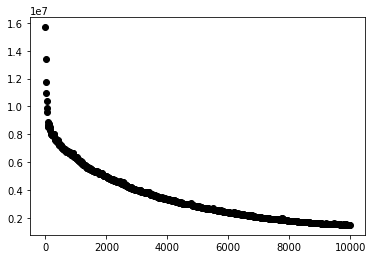

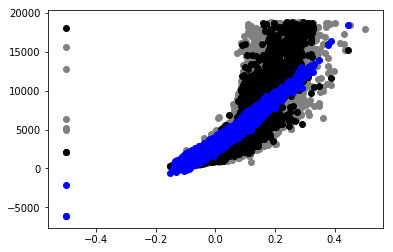

In [137]:
print("Coefficients: \n")
pp.pprint(thetas)

print("\nMean squared error: %.2f"
      % mean_squared_error(target_test, get_predictions(dataset_test, thetas)))

graph_add_scatter(itr_numbers, costs)
plot()
graph_add_scatter(get_feature(dataset_train, 'x'), target_train,c='gray')
graph_add_scatter(get_feature(dataset_test, 'x'), target_test,c='black')
graph_add_scatter(get_feature(dataset_test, 'x'), get_predictions(dataset_test, thetas), c='blue')
plot()

In [33]:
#####################################
#                                   #
#     BATCH GRADIENT ALGORITHM      #
#                                   #
#####################################

# Parameters:

learningRate    = 1e-03
max_iterations  = 100
batch_size      = 10
stopCondition   = 1e-03


thetas     = init_thetas(dataset_train)
done       = False
m          = len(dataset_train)
iterations = 0

# After j_step iterations, compute cost function
j_step      = 10
costs       = []
itr_numbers = []


while(iterations < max_iterations and not done):
    
    new_thetas = thetas.copy()
    
    # For each theta we do the following
    for key in range(len(thetas)):
        
        s = 0
        # We add every row of the dataset to the error calculation (Batch)
        for i in range(len(dataset_train)):
            
            h = 0
            # Calculating the value for theta
            for kt in range(len(thetas)):
                h += thetas[kt] * dataset_train[i][kt]
                
            s += (h - float(target_train[i])) * dataset_train[i][key]
        
        # Updating the new thetas vector values
        new_thetas[key] = thetas[key] - ((learningRate / m) * s)
    
    if iterations % j_step == 0:
        costs.append(calculate_cost_function(thetas, dataset_train, target_train))
        itr_numbers.append(iterations)
    
    # If the change in value for new thetas is too small, we can stop iterating
    done = True
    for k in range(len(thetas)):
        done = abs(thetas[k] - new_thetas[k]) < stopCondition and done

    # Atualization of the values of the thetas
    thetas = new_thetas.copy()
    iterations = iterations + 1
    
if iterations >= max_iterations:
    print("Stopped by number of iterations\n")
if done:
    print("Stopped by convergence\n")

Stopped by number of iterations



Coefficients: 

[   366.24722884414876,
    -93.55852834877335,
    76.68049785206182,
    5.672738102106679,
    -37.18079550635662,
    49.24382929687,
    -140.75606076614022,
    -134.74331032383373,
    2.172344835341078,
    -29.810529199941545]


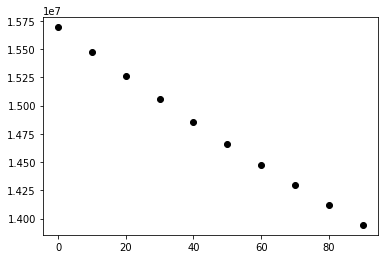

In [35]:
print("Coefficients: \n")
pp.pprint(thetas)

graph_add_scatter(itr_numbers, costs)
plot()

In [36]:
#####################################
#                                   #
#   MINI BATCH GRADIENT ALGORITHM   #
#                                   #
#####################################

# Parameters:

learningRate    = 1e-03
max_iterations  = 100000
batch_size      = 10
stopCondition   = 1e-03


thetas     = init_thetas(dataset_train)
done       = False
m          = len(dataset_train)
iterations = 0

# After j_step iterations, compute cost function
j_step      = 1000
costs       = []
itr_numbers = []


while(iterations < max_iterations and not done):
    
    # Step through the dataset in chuncks
    for row in range(0, len(dataset_train), batch_size):
        new_thetas = thetas.copy()
        
        # For each theta we do the following
        for k in range(len(thetas)):

            s = 0
            # We add every row of the dataset to the error calculation (Batch)
            for offset in range(batch_size):
                if row + offset >= m:
                    break
                
                h = 0
                # Calculating the value for theta
                for i in range(len(thetas)):
                    h += thetas[i] * dataset_train[row+offset][i]

                s += (h - float(target_train[row+offset])) * dataset_train[row+offset][k]

            # Updating the new thetas vector values
            new_thetas[k] = thetas[k] - ((learningRate / batch_size) * s)
        
        if iterations % j_step == 0:
            costs.append(calculate_cost_function(thetas, dataset_train, target_train))
            itr_numbers.append(iterations)
        
        iterations = iterations + 1
        if iterations >= max_iterations:
            break
            
        # If the change in value for new thetas is too small, we can stop iterating
        done = True
        for k in range(len(thetas)):
            done = abs(thetas[k] - new_thetas[k]) < stopCondition and done
        if done:
            break

        # Atualization of the values of the thetas
        thetas = new_thetas.copy()
    
if iterations >= max_iterations:
    print("Stopped by number of iterations\n")
if done:
    print("Stopped by convergence\n")

Stopped by number of iterations



Coefficients: 

[   8065.087500118444,
    13534.07583437853,
    441.675003391685,
    418.9193606712352,
    1624.1025650352801,
    17429.218158906184,
    -115.75862554040208,
    417.2763627337387,
    12.094002684467641,
    -377.8970371043319]


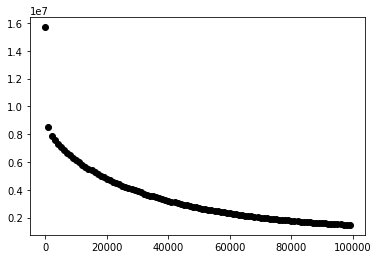

In [37]:
print("Coefficients: \n")
pp.pprint(thetas)

graph_add_scatter(itr_numbers, costs)
plot()

In [13]:
#####################################
#                                   #
#          NORMAL EQUATION          #
#                                   #
#####################################

mat_target = []
for row in range(len(target_train)):
    mat_target.append([target_train[row]])

mat_train = np.matrix(dataset_train)
mat_train_T = mat_train.transpose()
mat_target = np.matrix(mat_target)

thetas = np.matmul(np.matmul(inv(np.matmul(mat_train_T, mat_train)), mat_train_T), mat_target)

print(thetas)

[[ 24592.08801242]
 [ 56396.15665186]
 [   454.66548114]
 [  1940.31623813]
 [  3515.0095121 ]
 [-10003.47913586]
 [  2786.81982381]
 [  -127.34095647]
 [-10349.14729868]
 [ -4392.06386144]]


43.47258228414554
Coefficients: 

matrix([[ 24592.08801242],
        [ 56396.15665186],
        [   454.66548114],
        [  1940.31623813],
        [  3515.0095121 ],
        [-10003.47913586],
        [  2786.81982381],
        [  -127.34095647],
        [-10349.14729868],
        [ -4392.06386144]])

Mean squared error: 1484588.07


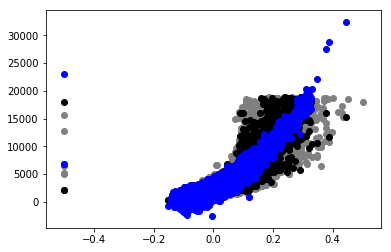

In [14]:
res = []
for rows in range(len(dataset_test)):
    res.append(np.matmul(dataset_test[rows],thetas)[0,0])

error = 0
for i in range(len(res)):
    error += abs(target_test[i] - res[i]) / target_test[i]
error /= len(res)
print(error * 100)

print("Coefficients: \n")
pp.pprint(thetas)

print("\nMean squared error: %.2f"
      % mean_squared_error(target_test, get_predictions(dataset_test, thetas)))

graph_add_scatter(get_feature(dataset_train, 'x'), target_train,c='gray')
graph_add_scatter(get_feature(dataset_test, 'x'), target_test,c='black')
graph_add_scatter(get_feature(dataset_test, 'x'), res, c='blue')
plot()

In [5]:
#####################################
#                                   #
#     SKLEARN LINEAR REGRESSION     #
#                                   #
#####################################

# Create linear regression object
regr = linear_model.SGDRegressor(max_iter=100000, eta0=0.0001)

# Train the model using the training sets
regr.fit(dataset_train, target_train)

# Make predictions using the validation set
diabetes_y_pred = regr.predict(dataset_test)

[3039.73050898 6702.42895453 7403.06257972 ... 2608.29298837  707.821852
  550.26468825]
[2220.0, 5041.0, 6145.0, 4637.0, 2326.0, 1662.0, 8608.0, 827.0, 14338.0, 766.0, 9262.0, 1800.0, 1072.0, 5649.0, 5898.0, 14125.0, 6504.0, 873.0, 1874.0, 567.0, 3461.0, 1088.0, 5201.0, 993.0, 628.0, 628.0, 18700.0, 752.0, 8316.0, 851.0, 784.0, 6533.0, 7625.0, 1438.0, 2038.0, 1381.0, 1070.0, 1585.0, 4329.0, 18780.0, 2939.0, 11655.0, 1086.0, 3903.0, 2655.0, 4664.0, 1257.0, 6423.0, 5008.0, 905.0, 3093.0, 8429.0, 12271.0, 3276.0, 1350.0, 1950.0, 760.0, 1089.0, 6526.0, 1708.0, 4224.0, 2946.0, 5385.0, 2879.0, 14750.0, 1700.0, 2277.0, 709.0, 4234.0, 15606.0, 4552.0, 1106.0, 1282.0, 1882.0, 673.0, 895.0, 447.0, 5556.0, 5588.0, 3040.0, 814.0, 480.0, 4782.0, 2058.0, 444.0, 589.0, 4258.0, 1956.0, 895.0, 812.0, 5766.0, 11257.0, 3992.0, 9414.0, 2579.0, 2579.0, 904.0, 2177.0, 2666.0, 3880.0, 743.0, 1013.0, 6174.0, 452.0, 940.0, 1228.0, 3685.0, 4562.0, 784.0, 842.0, 7350.0, 4285.0, 2399.0, 5696.0, 605.0, 3701.0, 92

Coefficients: 
 [ 6455.06107708 31541.09873713   524.04534439  1760.14547399
  3685.96350942 11780.14980499  -218.57654847   117.3723471
   790.82826608 -1345.31986481]
Intercept: 
 [7861.27278084]
Mean squared error: 1709386.78


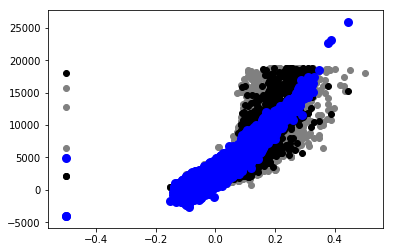

In [11]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, diabetes_y_pred))

# Plot outputs
plt.scatter(get_feature(dataset_train, 'x'), target_train, color='gray')
plt.scatter(get_feature(dataset_test, 'x'), target_test, color='black')
plt.scatter(get_feature(dataset_test, 'x'), diabetes_y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()